# **Lecture Notes**


1.   [pdf note](https://drive.google.com/file/d/1vTw98n_noLWFaIfNOhbseo8CojrKMhGj/view?usp=sharing)
2.   [Jamboard]()



# **Python Code**
---

## **Read Data**
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

import seaborn as sns
import scipy.stats as stats

In [ ]:
url = 'https://drive.google.com/file/d/1naXM02nfjESx3ABD-8RQ_E03TXLco9Je/view?usp=sharing'
returnpath = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [ ]:
returns = pd.read_csv(returnpath,index_col=0)


returns.head()

,SP500,Tesla
Date,,
1/4/2021,-0.014755,0.034152
1/5/2021,0.007083,0.007317
1/6/2021,0.005710,0.028390
1/7/2021,0.014847,0.079447
1/8/2021,0.005492,0.078403


## **Regression with Statsmodels module**
---

In [ ]:
model = sm.OLS(returns['Tesla'], sm.add_constant(returns['SP500'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Tesla   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     62.86
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           7.37e-14
Time:                        02:06:55   Log-Likelihood:                 519.67
No. Observations:                 252   AIC:                            -1035.
Df Residuals:                     250   BIC:                            -1028.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.002      0.180      0.8

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## **Residual Analysis**
---

In [ ]:
def four_in_one(dataframe,model):
    fitted_y = model.fittedvalues
    studentized_residuals = model.get_influence().resid_studentized_internal
    plt.figure(figsize=(10,10))
    ax1 = plt.subplot(221)
    stats.probplot(studentized_residuals, dist="norm", plot=plt)
    ax1.set_title('Normal Q-Q')
    ax1.set_xlabel('Normal Quantiles')
    ax1.set_ylabel('Studentized Residuals');

    ax2 = plt.subplot(222)
    ax2.hist(studentized_residuals)
    ax2.set_xlabel('Studentized Residuals')
    ax2.set_ylabel('Count')
    ax2.set_title('Histogram')

    ax3 = plt.subplot(223)
    t = range(dataframe.shape[0])
    ax3.scatter(t, studentized_residuals)
    ax3.set_xlabel('Observation order')
    ax3.set_ylabel('Residuals')
    ax3.set_title('Time series plot of studentized residuals')

    ax4 = plt.subplot(224)
    ax4 = sns.residplot(fitted_y, studentized_residuals,
                              lowess=True,
                              scatter_kws={'alpha': 0.5},
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    ax4.set_title('Internally Studentized Residuals vs Fitted values')
    ax4.set_xlabel('Fitted values')
    ax4.set_ylabel('Studentized Residuals');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


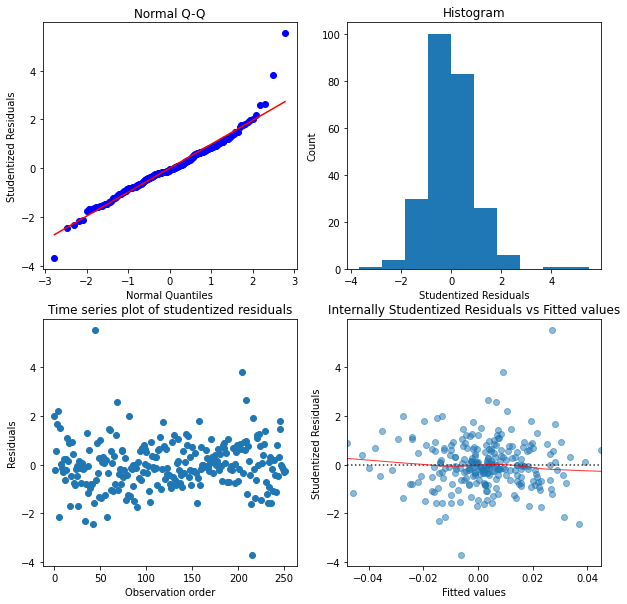

In [ ]:
four_in_one(returns, model)

## **Making Prediction**
---

In [ ]:
x_min = -0.13
x_max = 0.11

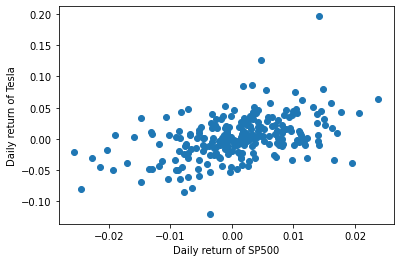

In [ ]:
plt.scatter(returns['SP500'], returns['Tesla'])
plt.xlabel('Daily return of SP500')
plt.ylabel('Daily return of Tesla')
plt.show()

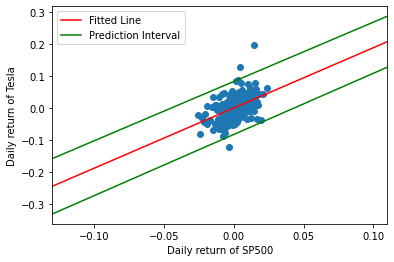

In [ ]:
plt.scatter(returns['SP500'], returns['Tesla'])
plt.plot([x_min, x_max], model.predict([[1, x_min], [1, x_max]]), color = 'red', label = 'Fitted Line')
plt.plot([x_min, x_max], model.get_prediction([[1, x_min], [1, x_max]]).summary_frame()['obs_ci_lower'].values, color = 'green', label = 'Prediction Interval')
plt.plot([x_min, x_max], model.get_prediction([[1, x_min], [1, x_max]]).summary_frame()['obs_ci_upper'].values, color = 'green')

plt.xlim([x_min, x_max])
plt.xlabel('Daily return of SP500')
plt.ylabel('Daily return of Tesla')
plt.legend(loc = 'upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


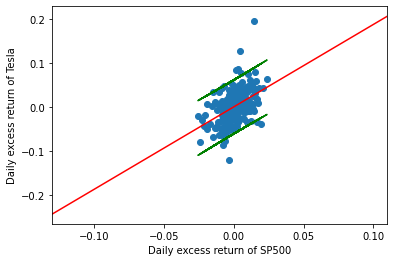

In [ ]:
plt.scatter(returns['SP500'], returns['Tesla'])
plt.plot([x_min, x_max], model.predict([[1, x_min], [1, x_max]]), color = 'red')
plt.plot(returns['SP500'].values, model.get_prediction(sm.add_constant(returns['SP500'])).summary_frame()['obs_ci_lower'].values, color = 'green')
plt.plot(returns['SP500'].values, model.get_prediction(sm.add_constant(returns['SP500'])).summary_frame()['obs_ci_upper'].values, color = 'green')

plt.xlim([x_min, x_max])
plt.xlabel('Daily excess return of SP500')
plt.ylabel('Daily excess return of Tesla')
plt.show()

## **Case Study: Retail Profit**
---

### **Background:**
---
A chain of pharmacies is looking to expand into a new community. It collects data from 110 existing stores and from the target community. This time we are going to build a regression model based on 110 existing stores, and then use it to
- know whether and how these variables are related to profits
- predict the expected sales for the new communities.
- find underperforming sites

## **Preloading Modules and Functions**
---
Many programmers have developed different packages to simplify our job. So here instead of doing things from nothing, we import package from the internet and use it directly.

In [1]:
# Pandas is for using data structures
import pandas as pd
# statsmodels contain modules for regression and time series analysis
import statsmodels.formula.api as smf
# statsmodels contain modules for regression and time series analysis
import statsmodels.api as sm
# numpy is for numerical computing of array and matrix
import numpy as np
# Matplotlib is a plotting package
import matplotlib.pyplot as plt
# matplotlib Showing the plot right after the current code  
%matplotlib inline
# scatter plot matrix
import seaborn as sns
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### **getvif(X): return the vif of each predictor in the given X matrix**
- input:
    - X: Predictors matrix
- output:
    - A table of VIF of each predictor

In [2]:
def getvif(X):
    X = sm.add_constant(X)
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["Predictors"] = X.columns
    return(vif.drop(index = 0).round(2)) 

#### **four_in_one(dataframe, model): return the normal QQ plot, histogram, time series plot of residual and scatter of residual versus fitted values.**
- Input
    - dataframe: The data set consisting of both X and Y
    - model: Fitted regression model used to calculate fitted values
- Output
    - A four-in-one residual plot

In [3]:
def four_in_one(dataframe,model):
    fitted_y = model.fittedvalues
    studentized_residuals = model.get_influence().resid_studentized_internal
    plt.figure(figsize=(10,10))
    ax1 = plt.subplot(221)
    stats.probplot(studentized_residuals, dist="norm", plot=plt)
    ax1.set_title('Normal Q-Q')
    ax1.set_xlabel('Normal Quantiles')
    ax1.set_ylabel('Studentized Residuals');

    ax2 = plt.subplot(222)
    ax2.hist(studentized_residuals)
    ax2.set_xlabel('Studentized Residuals')
    ax2.set_ylabel('Count')
    ax2.set_title('Histogram')

    ax3 = plt.subplot(223)
    t = range(dataframe.shape[0])
    ax3.scatter(t, studentized_residuals)
    ax3.set_xlabel('Observation order')
    ax3.set_ylabel('Studentized Residuals')
    ax3.set_title('Time series plot of studentized residuals')

    ax4 = plt.subplot(224)
    ax4 = sns.residplot(fitted_y, studentized_residuals,
                              lowess=True,
                              scatter_kws={'alpha': 0.5},
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    ax4.set_title('Studentized Residuals vs Fitted values')
    ax4.set_xlabel('Fitted values')
    ax4.set_ylabel('Studentized Residuals');

#### **prediction(new_X, model):**
- Input:
    - new_X: An array consisting of new data
    - model: Fitted regression model used to predict the response value with the new_X
- Output:
    - A table consisting of the expected value, 95% confidence and prediction interval of Y given the new_X, 

In [4]:
def prediction(new_X,model):
    return(model.get_prediction(new_X).summary_frame())

#### **outlier(dataframe, model, Type='all'): Return the unusual performing site**
- Input:
    - dataframe: The data set consisting of both X and Y (with "Location")
    - model: Fitted regression model used to calculate residuals
    - type: 'all' by default, input 'neg'/'posi' will return the underperforming/outerperforming site only
- Output:
    - Return the index, location, expected profit and actual profit of each unusual performing site

In [5]:
def outlier(dataframe,model,Type='all'):
    A = dataframe.copy()
    A = A.dropna()
    A.index = range(1,A.shape[0]+1)
    studentized_residuals = model.get_influence().resid_studentized_internal
    A["ExpectProfit"] = model.fittedvalues
    if Type == 'neg':
        return(A[["Location","ExpectProfit","Profit"]][studentized_residuals<-2])
    elif Type == 'posi':
        return(A[["Location","ExpectProfit","Profit"]][studentized_residuals>2])
    else:
        return(A[["Location","ExpectProfit","Profit"]][np.abs(studentized_residuals)>2])

### **Import data**
---


In [7]:
url = 'https://drive.google.com/file/d/1pZ7xqTp_1hRXKl8sjpRuy7zvJLkyUz21/view?usp=sharing'
profitpath = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df = pd.read_csv(profitpath) # Store the data to a variable called 'df'
df.head()

,Location,Profit,Income,Disposable Income,"Birth Rate (per 1,000)","Soc Security (per 1,000)","CV Death (per 100,000)",% 65 or Older
0,"Albany-Schenectady-Troy,NY",199780.0,28719,22701,13.1,177.7,429.9,14.6
1,"Albuquerque,NM",165530.0,25835,19890,15.8,143.8,222.9,10.7
2,"Altoona,PA",208670.0,22675,18051,11.6,179.8,561.5,17.6
3,"Anchorage,AK",166890.0,33501,27031,18.5,62.5,99.8,4.7
4,"Appleton-Oshkosh-Neenah,WI",209190.0,27107,21182,13.6,152.6,319.4,12.0


In [8]:
# showing the dimentiona of data
df.shape
# Output: (number of row, number of column)

(111, 8)

### **Data Cleaning**
---
There is useless information in our source data, including the location (useless for modelling since all the store operated at different community), the data of the new community (we will substitute the information to the model in order to predict the profit).
So, obviously we have to drop rows and columns from the data. There are several ways to do so. Here we introduce *loc*, *iloc*, *drop* and simple python-indexing to select the data you want.

In [9]:
# dropping useless data
# Method 1: drop(columns, index)
df_p = df.drop(columns="Location",index=110)
df_p.tail()

,Profit,Income,Disposable Income,"Birth Rate (per 1,000)","Soc Security (per 1,000)","CV Death (per 100,000)",% 65 or Older
105,182710.0,19768,15783,21.3,143.7,319.4,11.0
106,211060.0,25170,19444,13.0,187.8,422.1,13.5
107,305020.0,29057,33519,13.3,255.2,528.4,24.3
108,201730.0,19780,17759,20.4,151.8,368.5,12.3
109,211620.0,25981,19155,12.8,212.3,477.9,16.2


**dropna()** can drop rows with missing data
Since data from new location missing the profit data, it will be deleted from data

In [10]:
df.dropna()

,Location,Profit,Income,Disposable Income,"Birth Rate (per 1,000)","Soc Security (per 1,000)","CV Death (per 100,000)",% 65 or Older
0,"Albany-Schenectady-Troy,NY",199780.0,28719,22701,13.1,177.7,429.9,14.6
1,"Albuquerque,NM",165530.0,25835,19890,15.8,143.8,222.9,10.7
2,"Altoona,PA",208670.0,22675,18051,11.6,179.8,561.5,17.6
3,"Anchorage,AK",166890.0,33501,27031,18.5,62.5,99.8,4.7
4,"Appleton-Oshkosh-Neenah,WI",209190.0,27107,21182,13.6,152.6,319.4,12.0
...,...,...,...,...,...,...,...,...
105,"Visalia-Tulare-Porterville,CA",182710.0,19768,15783,21.3,143.7,319.4,11.0
106,"Waterloo-CedarFalls,IA",211060.0,25170,19444,13.0,187.8,422.1,13.5
107,"WestPalmBeach-BocaRaton,FL",305020.0,29057,33519,13.3,255.2,528.4,24.3
108,"Yakima,WA",201730.0,19780,17759,20.4,151.8,368.5,12.3


### **Data vistualization**
---

In [11]:
# view summary statistics
df_p.describe()

,Profit,Income,Disposable Income,"Birth Rate (per 1,000)","Soc Security (per 1,000)","CV Death (per 100,000)",% 65 or Older
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,184007.727273,25600.790909,19855.663636,14.919091,160.932727,343.725455,12.342727
std,26647.813572,3788.046816,3223.703379,3.001085,37.302503,89.508622,3.326553
min,132700.000000,18551.000000,11287.000000,9.300000,62.500000,99.800000,4.700000
25%,165595.000000,23243.000000,17950.000000,13.300000,139.450000,285.225000,10.225000
50%,182525.000000,24933.500000,19244.500000,14.550000,159.350000,343.050000,12.050000
75%,200657.500000,27784.000000,21813.250000,15.875000,178.450000,396.100000,13.875000
max,305020.000000,40089.000000,33519.000000,29.900000,304.500000,581.800000,24.800000


**Correlation Matrix**
Correlation matrix gives you the actual correlation between each variables, including response variable and explanatory variables.

In [12]:
corr = df_p.corr()
corr

,Profit,Income,Disposable Income,"Birth Rate (per 1,000)","Soc Security (per 1,000)","CV Death (per 100,000)",% 65 or Older
Profit,1.000000,0.264189,0.474030,-0.346955,0.667838,0.609221,0.774006
Income,0.264189,1.000000,0.777336,-0.090546,-0.129612,-0.050192,-0.056456
Disposable Income,0.474030,0.777336,1.000000,-0.256004,0.062751,0.056417,0.164917
"Birth Rate (per 1,000)",-0.346955,-0.090546,-0.256004,1.000000,-0.584519,-0.549885,-0.553926
"Soc Security (per 1,000)",0.667838,-0.129612,0.062751,-0.584519,1.000000,0.852511,0.938004
"CV Death (per 100,000)",0.609221,-0.050192,0.056417,-0.549885,0.852511,1.000000,0.866711
% 65 or Older,0.774006,-0.056456,0.164917,-0.553926,0.938004,0.866711,1.000000


**Scatter Matrix** 
Just like covariance matrix, scatter matrix also shows the correlation between variables, except scatter matrix uses scatter plot to display their correlations. It makes the relationship between variables becomes apparent.

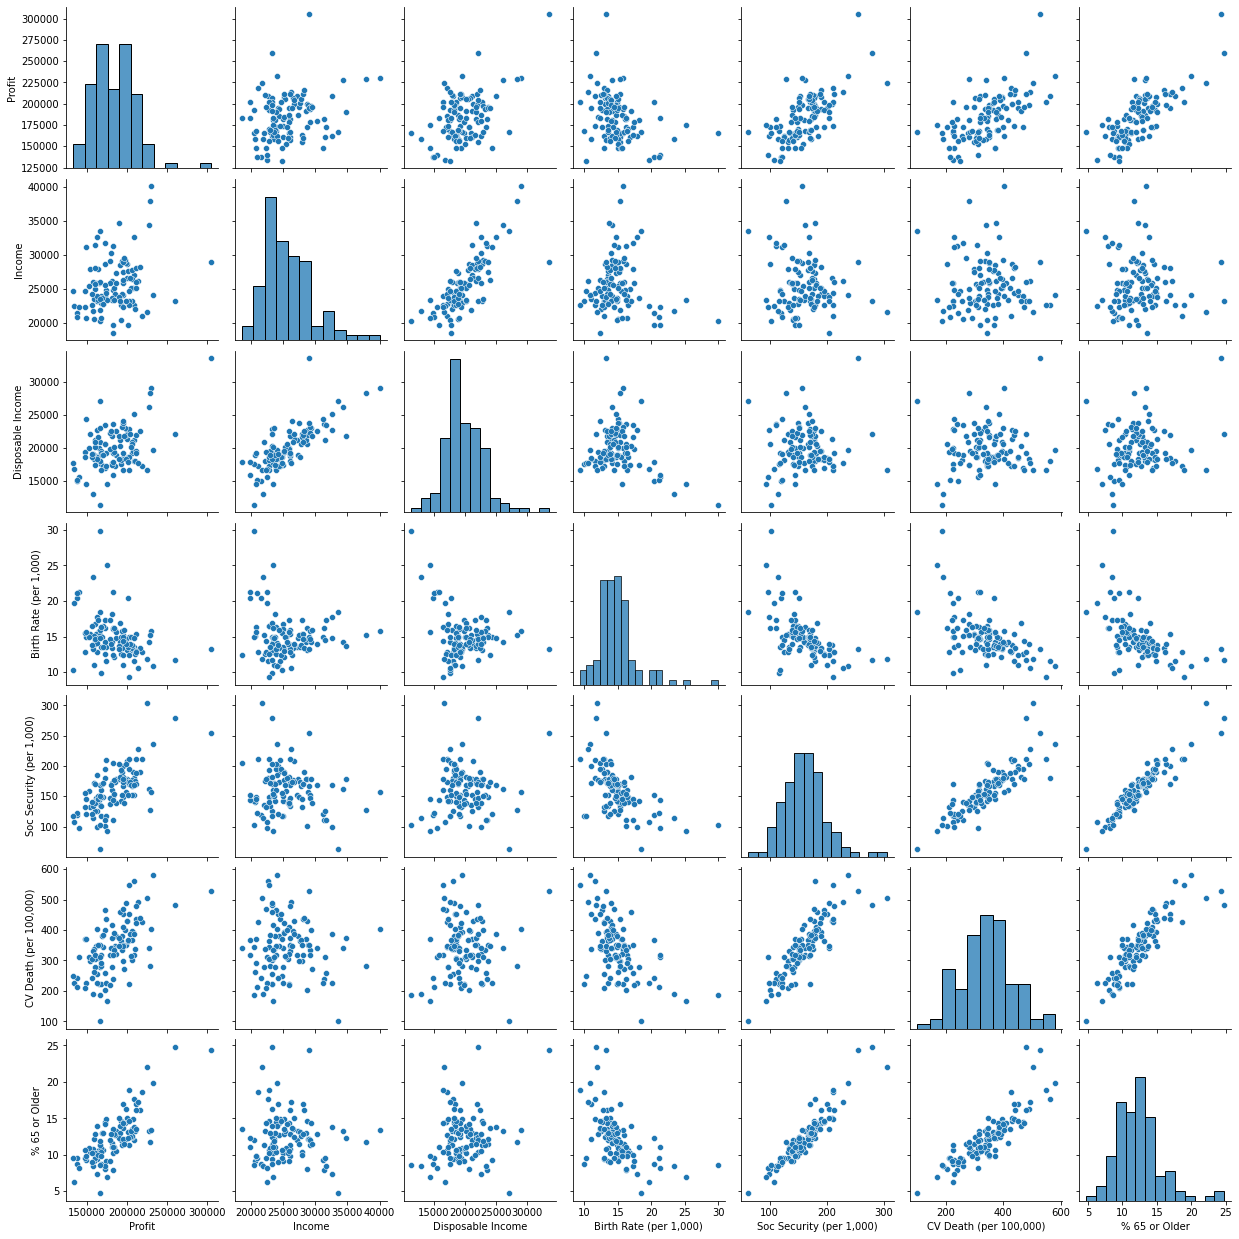

In [13]:
sns_plot = sns.pairplot(df_p)

### **Multiple Regression**
 Setting up the predictor matrix, X & respond matrix, Y

In [14]:
# Specify the dependent variable and independent variables
X = df_p.drop(columns="Profit")
Y = df_p['Profit']

#### **Build up the initial model**


In [15]:
# You can name the model as 'model_fit1' or any name
# Command: sm.OLS(Y, design matrix X).fit()
model_fit1 = sm.OLS(Y,sm.add_constant(X)).fit()

print(model_fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     53.12
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           2.41e-29
Time:                        07:59:22   Log-Likelihood:                -1199.0
No. Observations:                 110   AIC:                             2412.
Df Residuals:                     103   BIC:                             2431.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### **Variable Selection**
---
Apparently, some variables are comparative useless, or statistically, insignificant in our model. Moreover, the mulcollinearity could reduce the model significance. In order to improve our model, checking the variance inflation factor (VIF) of each independent variables is important to identify mulcollinearity. Also, we need to drop those insigificant variables from our model.
**Calculate VIF**

In [16]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
getvif(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,VIF,Predictors
1,2.95,Income
2,3.30,Disposable Income
3,1.70,"Birth Rate (per 1,000)"
4,10.04,"Soc Security (per 1,000)"
5,4.71,"CV Death (per 100,000)"
6,11.39,% 65 or Older



**Dropping insignificant variables**
---



In [17]:
# drop insignificant x-variables
X_new = df_p.drop(columns=['Profit','Income','Soc Security (per 1,000)', 'CV Death (per 100,000)'])

In [18]:
X_new.head()

,Disposable Income,"Birth Rate (per 1,000)",% 65 or Older
0,22701,13.1,14.6
1,19890,15.8,10.7
2,18051,11.6,17.6
3,27031,18.5,4.7
4,21182,13.6,12.0


#### **Build up the final model**

In [19]:
# Refit multiple regression model and show summary of fit 
model_fit = sm.OLS(Y,sm.add_constant(X_new)).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     107.2
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           5.73e-32
Time:                        08:01:47   Log-Likelihood:                -1199.8
No. Observations:                 110   AIC:                             2408.
Df Residuals:                     106   BIC:                             2418.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.00

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


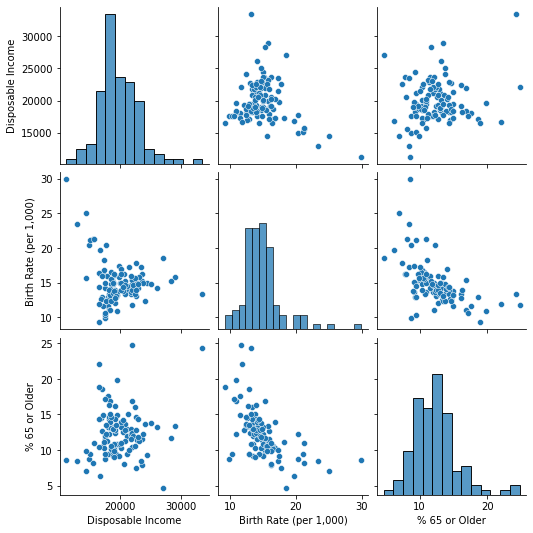

In [20]:
sns_plot_1 = sns.pairplot(df_p, vars = ["Disposable Income", "Birth Rate (per 1,000)", "% 65 or Older"])

### **Residual Analysis**
---
After modifying our model, one important step is to verify the assumptions of multiple regression. That's, the residuals should be independently, identically (homoscedasticity) and normally distributed. So in order to verify these conditions, we need to do the residual analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


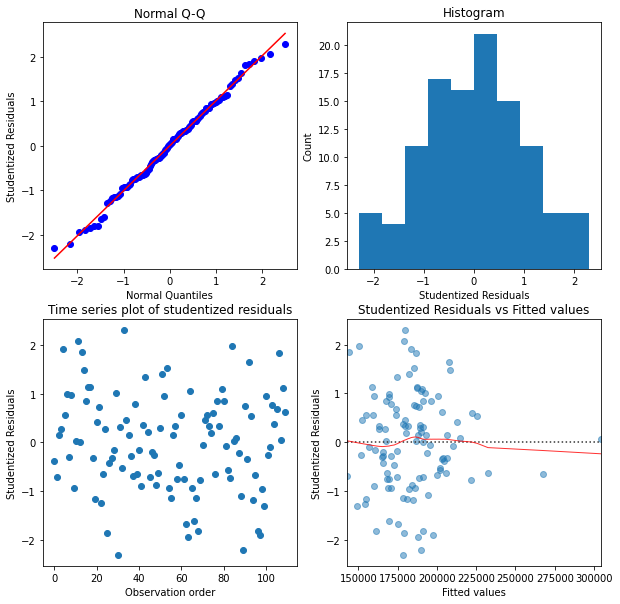

In [21]:
four_in_one(df_p,model_fit)
# plt.savefig("residual plot.jpg", dpi=300, bbox_inches='tight')

### **Predict the Profit**
---
**Extract information of the new community**

In [22]:
df[110:111].drop(columns=['Location','Profit','Income','Soc Security (per 1,000)', 'CV Death (per 100,000)'])

,Disposable Income,"Birth Rate (per 1,000)",% 65 or Older
110,22642,14.4,11.4


**Predict the profit for the new community**

In [23]:
Ynew = model_fit.predict([1,22642,14.4,11.4])
Ynew

array([185818.71050755])

In [24]:
prediction([1,22642,14.4,11.4],model_fit)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,185818.710508,1809.324546,182231.548617,189405.872398,158901.859001,212735.562014


### **Identify the underperformed sites**
---
Refer to page 3 of Topic 1, we have three goals in this anaylsis. The last one is to identify underperforming sites. So we could simply look at the difference between the actual and predicted sales, and see how large the difference is, that's, the residual.  
We assess the performance by using the studentized residuals. If the store has the sales way below the predicted, then we can consider it as "underperformance".

In [25]:
outlier(df,model_fit,Type="neg")

,Location,ExpectProfit,Profit
31,"Denver-Boulder-Greeley,CO",191341.557377,148440.0
90,"Rockford,IL",186600.404420,160050.0


###  **We should build the model using  train data**
---

In [26]:
# Split the data: training set 80%, test set 20% 
training_data = df_p.sample(frac=0.8, random_state=25)
testing_data = df_p.drop(training_data.index) 

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 88
No. of testing examples: 22


In [27]:
# Specify the dependent variable and independent variables in the training set and test set
X_train = training_data.drop(columns="Profit")
Y_train = training_data['Profit']

X_test = testing_data.drop(columns="Profit")
Y_test = testing_data['Profit']

In [28]:
## Full model
# Fit the full model in training set 
model_fit_full = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
#print(model_fit_full.summary())

# Predict Y on test set using the full model build in training set
Y_pred_full = model_fit_full.predict(sm.add_constant(X_test))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
## Final model 
# drop insignificant x-variables
X_train_new = X_train.drop(columns=['Income','Soc Security (per 1,000)', 'CV Death (per 100,000)'])
X_test_new = X_test.drop(columns=['Income','Soc Security (per 1,000)', 'CV Death (per 100,000)'])

# build the final model on the training set
model_fit_final = sm.OLS(Y_train, sm.add_constant(X_train_new)).fit()
#print(model_fit_final.summary())

# Predict Y on test set using the final model build in training set
Y_pred_final = model_fit_final.predict(sm.add_constant(X_test_new))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
# Calculate the RMSE
from sklearn.metrics import mean_squared_error
mse_full = np.sqrt(mean_squared_error(Y_test, Y_pred_full))
mse_final = np.sqrt(mean_squared_error(Y_test, Y_pred_final))
print(f"Test set RMSE (Full model) : {mse_full}")
print(f"Test set RMSE (Final model): {mse_final}")

Test set RMSE (Full model) : 14007.541348265493
Test set RMSE (Final model): 13989.192766250271


# **In Class Practice**
---



1.   [Python Notebook](https://colab.research.google.com/drive/1C3Q2oD9rsC_ONOQwnUDwDnJxj-z0gwt7#scrollTo=ff4d0c2b-9736-43f0-96b1-1ddd7899f714)
2.   [Problems and Solutions](https://docs.google.com/document/d/1YmTgYt2-SklV0saOuVjPml7VaTa-opP7/edit?usp=drive_web&ouid=104281439514443270362&rtpof=true)



# **Topic Questions for the final**
---






1.   [Problems and Solutions](https://docs.google.com/document/d/12wD0B7X3gJhR27fALO3xG_df843-d9NQ/edit)
2.   [Python notebook](https://colab.research.google.com/drive/1RBLmfbp41_9MkrWfTfS71CiErGcTciQX)

